In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import hvplot.pandas

In [38]:
ethdata = yf.download("ETH-USD", start="2020-04-08", end="2022-04-08")
eth_df = pd.DataFrame(ethdata)
eth_df.to_csv("eth_data.csv")

[*********************100%***********************]  1 of 1 completed


In [39]:
eth_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-08,165.240326,173.210266,164.493195,172.641739,172.641739,17063110836
2020-04-09,172.761261,172.897781,167.987122,170.807144,170.807144,14901696210
2020-04-10,170.829269,170.949768,154.914474,158.412445,158.412445,17980944616
2020-04-11,158.538986,161.167572,155.298340,158.216019,158.216019,13555089447
2020-04-12,158.232391,164.516953,156.320511,161.142426,161.142426,15123721386


In [40]:
eth_close = eth_df[['Close']]
eth_close.head()

,Close
Date,
2020-04-08,172.641739
2020-04-09,170.807144
2020-04-10,158.412445
2020-04-11,158.216019
2020-04-12,161.142426


In [41]:
eth_close.hvplot(title='ETH-USD', figsize=(16,8))

:Curve   [Date]   (Close)

In [42]:
eth_df.drop(['Adj Close', 'Volume'], axis='columns', inplace=True)
eth_df.head(5)

,Open,High,Low,Close
Date,,,,
2020-04-08,165.240326,173.210266,164.493195,172.641739
2020-04-09,172.761261,172.897781,167.987122,170.807144
2020-04-10,170.829269,170.949768,154.914474,158.412445
2020-04-11,158.538986,161.167572,155.298340,158.216019
2020-04-12,158.232391,164.516953,156.320511,161.142426


In [57]:
#shifting the data down to make the data more current
eth_df['Open']=eth_df.Open.shift(-1)
eth_df['High']=eth_df.High.shift(-1)
eth_df['Low']=eth_df.Low.shift(-1)
eth_df['Volume']=eth_df.Low.shift(-1)
eth_df.dropna(inplace=True)
X=eth_df.copy()
X.drop("Close", axis=1, inplace=True)
X

,Open,High,Low,Volume
Date,,,,
2020-04-08,170.829269,170.949768,154.914474,155.298340
2020-04-09,158.538986,161.167572,155.298340,156.320511
2020-04-10,158.232391,164.516953,156.320511,151.614487
2020-04-11,160.720673,160.749695,151.614487,155.865936
2020-04-12,156.355957,160.944275,155.865936,152.802841
...,...,...,...,...
2022-03-31,3449.788574,3521.284668,3442.000244,3421.259766
2022-04-01,3444.810547,3573.960205,3421.259766,3422.000977
2022-04-02,3522.364990,3535.148193,3422.000977,3410.547607


In [44]:
y = eth_df["Close"].ravel()
y[:5]

array([172.64173889, 170.80714417, 158.41244507, 158.21601868,
       161.14242554])

In [45]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
len(X_train)

511

In [47]:
len(X_test)

220

In [48]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

In [49]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [50]:
model = LinearRegression()

In [51]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [52]:
predictions = model.predict(X_test_scaled)

In [53]:
stocks = pd.DataFrame({
    "Real": y_test.ravel(),
    "Predicted": predictions.ravel()
    }, index = eth_df.index[-len(y_test): ])
stocks.head(100)

,Real,Predicted
Date,,
2021-09-01,3834.828125,3757.853870
2021-09-02,3790.989990,3748.264757
2021-09-03,3940.614746,3935.688987
2021-09-04,3887.828369,3883.013270
2021-09-05,3952.133545,3922.870602
...,...,...
2021-12-05,4198.322754,4165.043179
2021-12-06,4358.737305,4160.931311
2021-12-07,4315.061523,4340.615721


<AxesSubplot:xlabel='Date'>

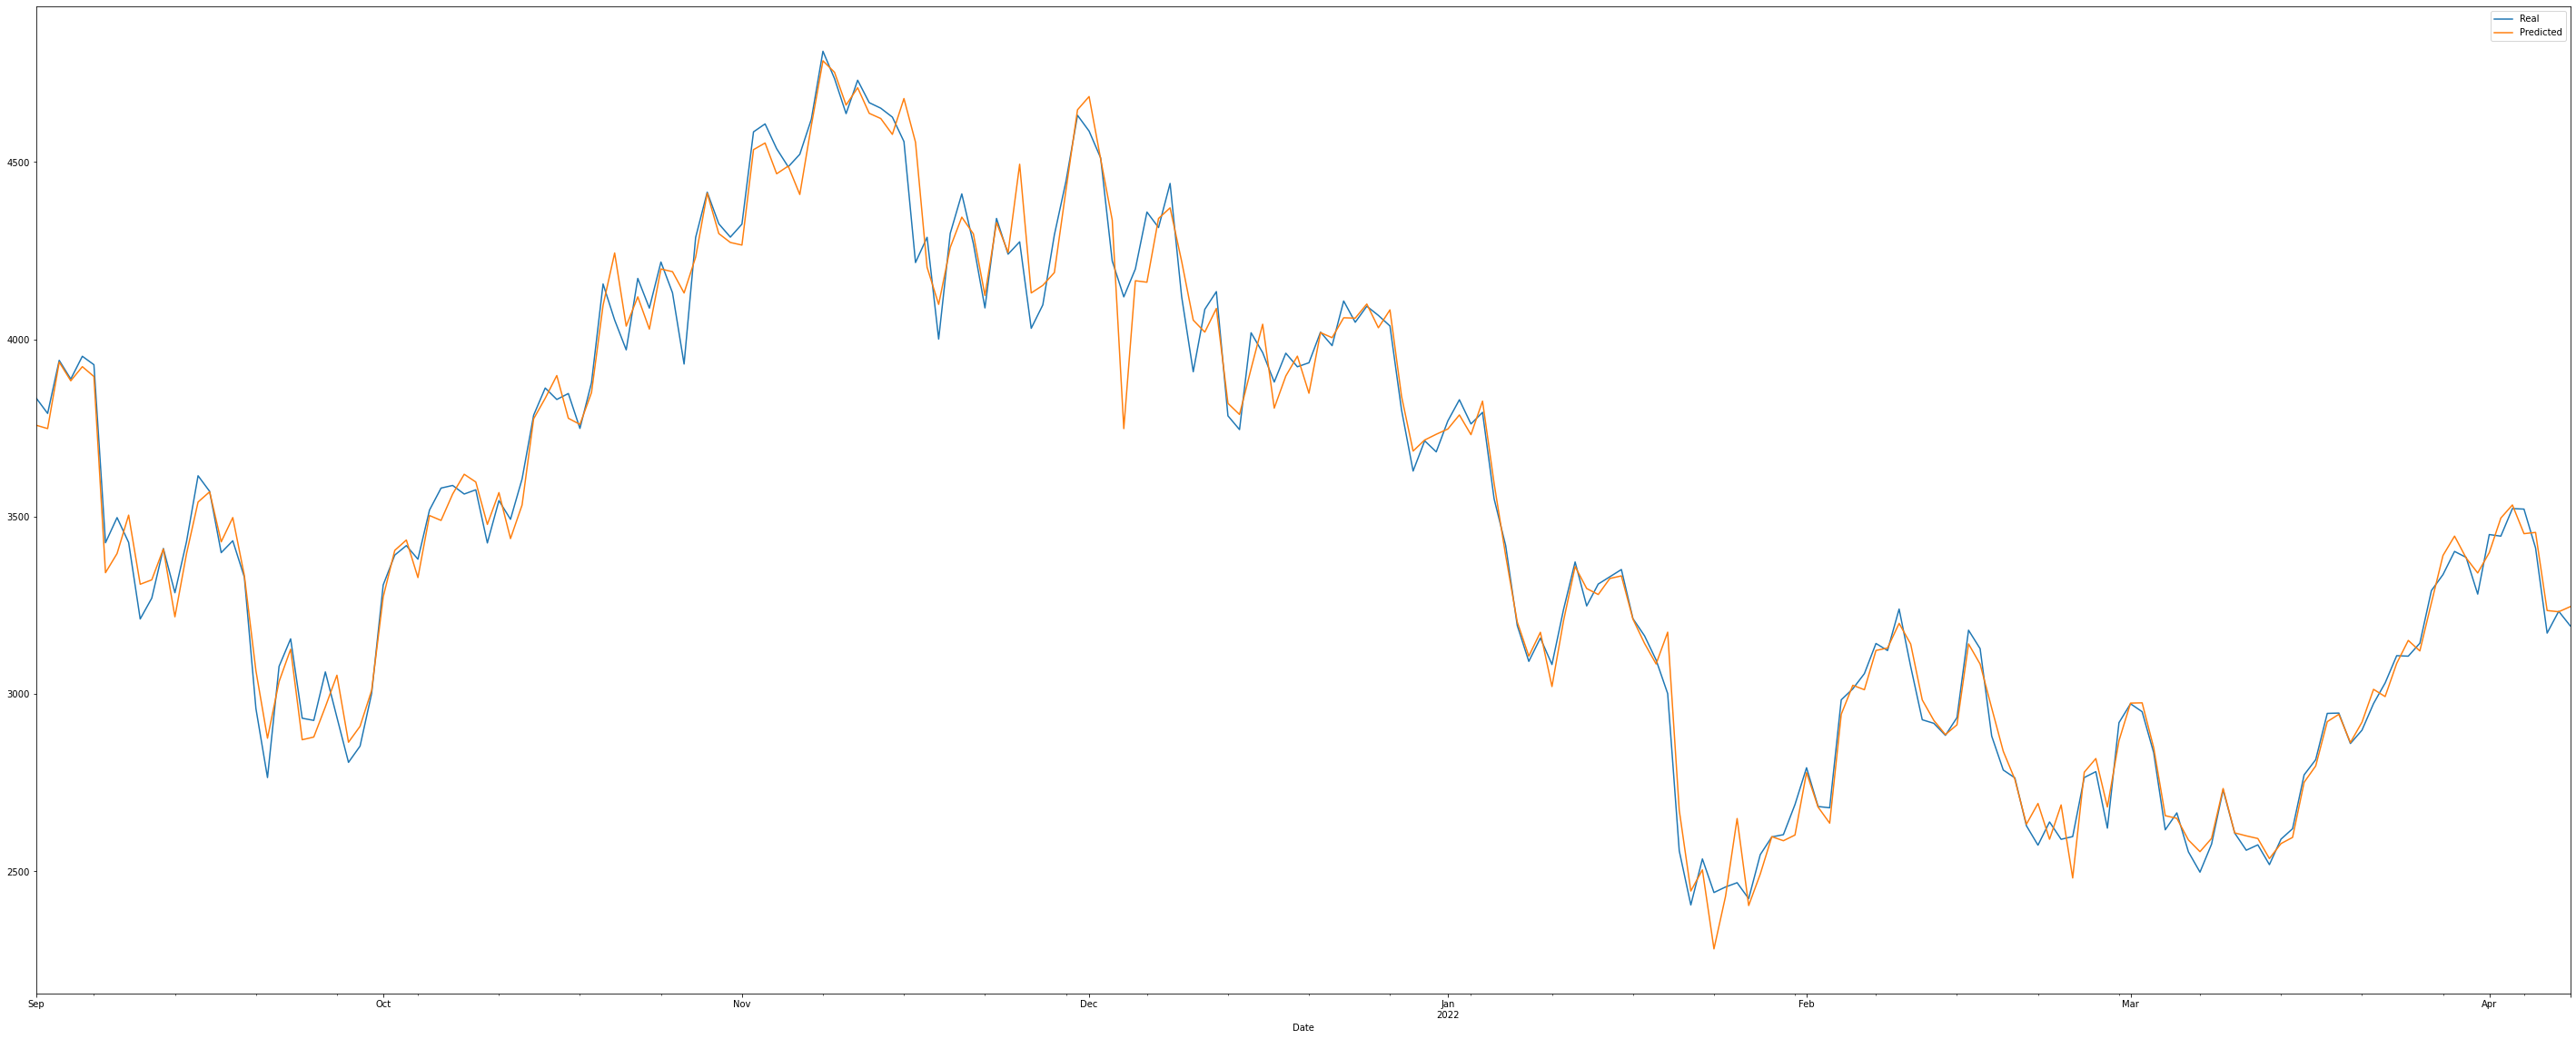

In [54]:
stocks.plot(figsize=(50, 20))

In [58]:
from sklearn import metrics

print(f'Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions), 4))
print(f'Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions), 4))
print(f'Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 4))
print(f'(R^2) Score:', round(metrics.r2_score(y_test, predictions), 4))
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 49.1448
Mean Squared Error: 4870.3125
Root Mean Squared Error: 69.7876
(R^2) Score: 0.9879
Accuracy: 98.58 %.
